In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display

from scipy.stats import median_abs_deviation
from sklearn.preprocessing import MinMaxScaler

import IPython.display as ipd

In [3]:
sr = 44000

audio = 'hello.wav'
x, _ = librosa.load(audio, sr=sr)

audio2 = 'hello_stretch.wav'
x2, _ = librosa.load(audio2, sr=sr)

audio3 = 'hello_long.wav'
x3, _ = librosa.load(audio3, sr=sr)

audio4 = "hello_repeat.wav"
x4, _ = librosa.load(audio4, sr=sr)

In [21]:
print("Simple Hello")
ipd.Audio(x, rate = sr)

Simple Hello


In [22]:
print("Hello with different intonation")
ipd.Audio(x2, rate = sr)

Hello with different intonation


In [23]:
print("Simple Hello + Silence")
ipd.Audio(x3, rate = sr)

Simple Hello + Silence


In [24]:
print("Repeating Simple Hello for Consistency Check")
ipd.Audio(x4, rate = sr)

Repeating Simple Hello for Consistency Check


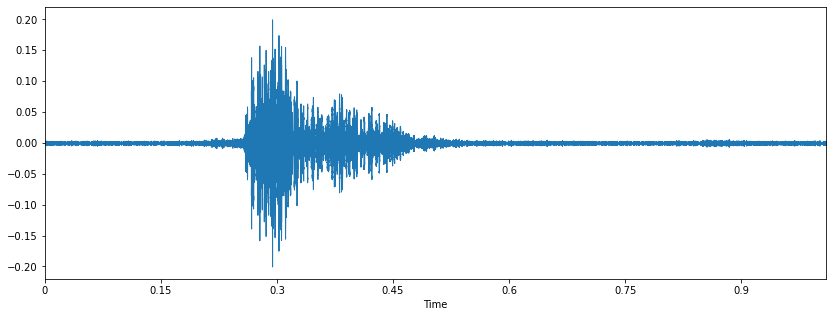

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr = sr)

In [36]:
def process_audio(audio, n = 10000, plot_fft = False):
    # Picking top 10,000 frequencies (maybe too large a number since it will pick up background noise). 

    # Will look at reducing it when analyzing sentences and different accents / backgrounds.

    audio_fft = np.fft.fft(audio)
    audio_fft_p1 = audio_fft[0: int(len(audio_fft) / 2)]
    audio_abs = np.abs(audio_fft_p1)
    
    if plot_fft:
        plt.figure(figsize=(14, 5))
        plt.plot(audio_abs)
    
    audio_top = (-audio_abs).argsort()[:n]
    
    scaler = MinMaxScaler()
    audio_top_scaled = scaler.fit_transform(audio_top.reshape(-1, 1))

    audio_top_scaled = audio_top_scaled.reshape(1, -1)
    
    return audio_top_scaled

Simple std isn't consistent across recording. Also, realized doesn't make sense. Simple std is not comparing frequencies, but magnitude (confidence) of frequencies.

FFT for Simple Hello


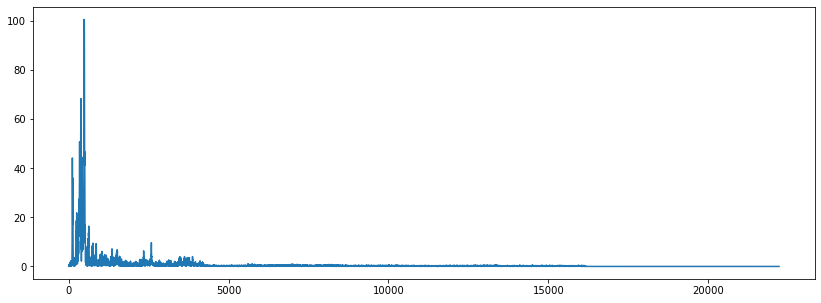

In [42]:
print("FFT for Simple Hello")
x_proc = process_audio(x, plot_fft = True)

x2_proc = process_audio(x2)
x3_proc = process_audio(x3)
x4_proc = process_audio(x4)

Based on the duration of the audio file, the scale of the FFT is different. 
Using MinMaxScaler to preserve distribution but keep scale consistent. 

In [43]:
np.std(x_proc), np.std(x2_proc), np.std(x3_proc), np.std(x4_proc)

(0.28145193182135764,
 0.11761245405857797,
 0.28337697153578456,
 0.24280417291255993)

Comparison is much better now.

In [57]:
# reading longer audio files
long_file1 = 'twenty_bland.wav'
twenty_bland, _ = librosa.load(long_file1, sr=sr)

long_file2 = 'twenty_with_intonation.wav'
twenty_inton, _ = librosa.load(long_file2, sr=sr)

In [52]:
print("20 secs bland audio")
ipd.Audio(twenty_bland, rate = sr)

20 secs bland audio


In [58]:
print("20 secs with some intonation")
ipd.Audio(twenty_inton, rate = sr)

20 secs with some intonation


20 secs bland audio


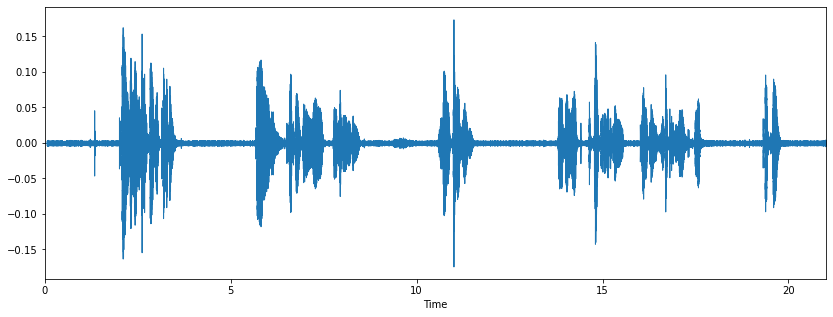

In [60]:
print("20 secs bland audio")
plt.figure(figsize=(14, 5))
librosa.display.waveplot(twenty_bland, sr = sr)

20 secs with some intonation


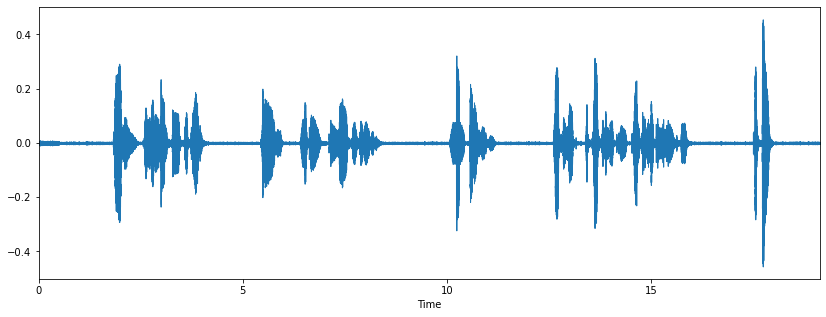

In [61]:
print("20 secs with some intonation")
plt.figure(figsize=(14, 5))
librosa.display.waveplot(twenty_inton, sr = sr)

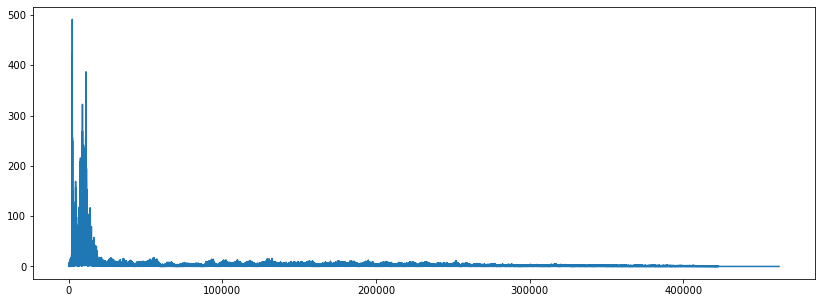

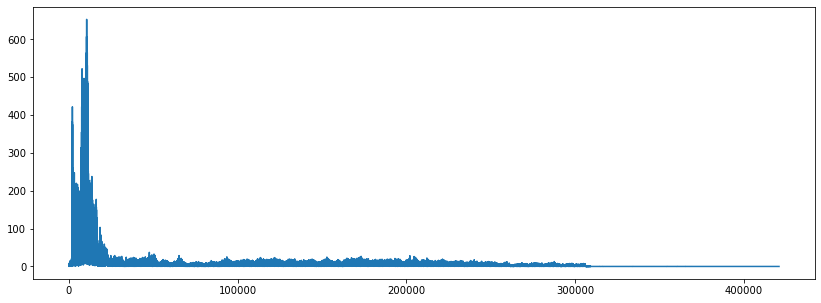

In [78]:
twenty_bland_proc = process_audio(twenty_bland, n = 10000, plot_fft=True)
twenty_inton_proc = process_audio(twenty_inton, n = 10000, plot_fft=True)

In [79]:
np.std(twenty_bland_proc), np.std(twenty_inton_proc)

(0.2413364837969458, 0.211215784589914)

In [81]:
(0.24 - 0.21) / 0.21

0.14285714285714285

In [82]:
(0.24 - 0.11) / 0.11

1.1818181818181819

In [83]:
(0.24 - 0.11) / 0.11

1.1818181818181819

In [84]:
(0.28 - 0.24) / 0.24

0.16666666666666682